In [235]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np

In [236]:
graphite_water_psf = r'D:\all_programming\MSD\data_files\unwrapped\graphite_water.psf'
graphite_trajectory_dcd = r'D:\all_programming\MSD\data_files\unwrapped\output_per_20ps.dcd'

global_uni = mda.Universe(graphite_water_psf,graphite_trajectory_dcd)
Oxg_uni = global_uni.select_atoms('resname SPCE and name OW')
# Importing data

In [237]:
def calculate_msd(position_dict):
    x_vals = np.array(position_dict['x_vals'])
    y_vals = np.array(position_dict['y_vals'])
    z_vals = np.array(position_dict['z_vals'])
    num_points = len(x_vals)
    msd = np.zeros(num_points)
    for dt in range(1, num_points):
        displacements = np.square(x_vals[dt:] - x_vals[:-dt]) + np.square(y_vals[dt:] - y_vals[:-dt]) + np.square(z_vals[dt:] - z_vals[:-dt])
        msd[dt] = np.mean(displacements)
    return msd

In [238]:
atomic_range = 500

In [239]:
atom_total_pos = {}

#for atom_num in range(len(Oxg_uni)):
for atom_num in range(atomic_range):
    atom_total_pos[atom_num] = {'x_vals':[],'y_vals':[],'z_vals':[]}

    for frame in range(len(global_uni.trajectory)):
        global_uni.trajectory[frame]
        oxg_pos = Oxg_uni.positions
        chosen_atom = oxg_pos[atom_num]

        atom_total_pos[atom_num]['x_vals'].append(chosen_atom[0])
        atom_total_pos[atom_num]['y_vals'].append(chosen_atom[1])
        atom_total_pos[atom_num]['z_vals'].append(chosen_atom[2])

In [240]:
msd_dict = {}

for atom_num in atom_total_pos.keys():
    msd_dict[atom_num] = calculate_msd(atom_total_pos[atom_num])

In [241]:
total_frames = len(global_uni.trajectory)
x_array = list(range(total_frames))
summed_list = np.zeros(total_frames)

for key in msd_dict.keys():
    for i in range(len(msd_dict[key])):
        summed_list[i] += msd_dict[key][i]

for i in range(len(summed_list)):
    summed_list[i] = summed_list[i] / atomic_range

In [247]:
X = np.array(x_array)
Y = np.array(summed_list)

[]

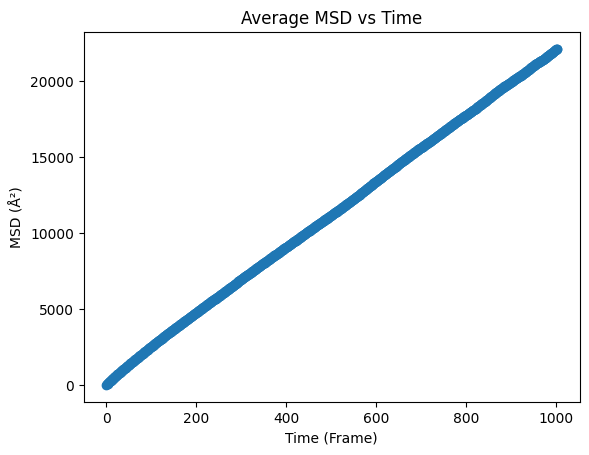

In [245]:
plt.scatter(X,Y)
plt.xlabel('Time (Frame)')
plt.ylabel('MSD (Å²)')
plt.title('Average MSD vs Time')
plt.plot()

y = 21.82* x +324.17


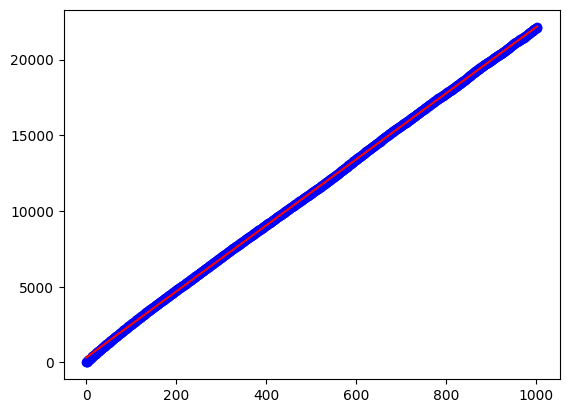

In [251]:
# Perform linear regression
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Generate best fit line
best_fit_line = slope * X + intercept

print(f'y = {round(slope,2)}* x +{round(intercept,2)}')

# Plot data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot best fit line
plt.plot(X, best_fit_line, color='red', label='Best Fit Line')